### Week 1: A simple classification task

Importing the required libraries for the task

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape

(59, 7)

In [4]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

#### Spliting the data

In [5]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#### Create classifier object

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =5)

#### Train the classifer using the training data

In [7]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Estimate the accuracy of the classifier on future data, using the test data

In [8]:
knn.score(X_test,y_test)

0.5333333333333333

#### Use the trained k-NN classifier model to classify new, previously unseen objects

In [9]:
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [10]:
fruit_prediction = knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

#### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


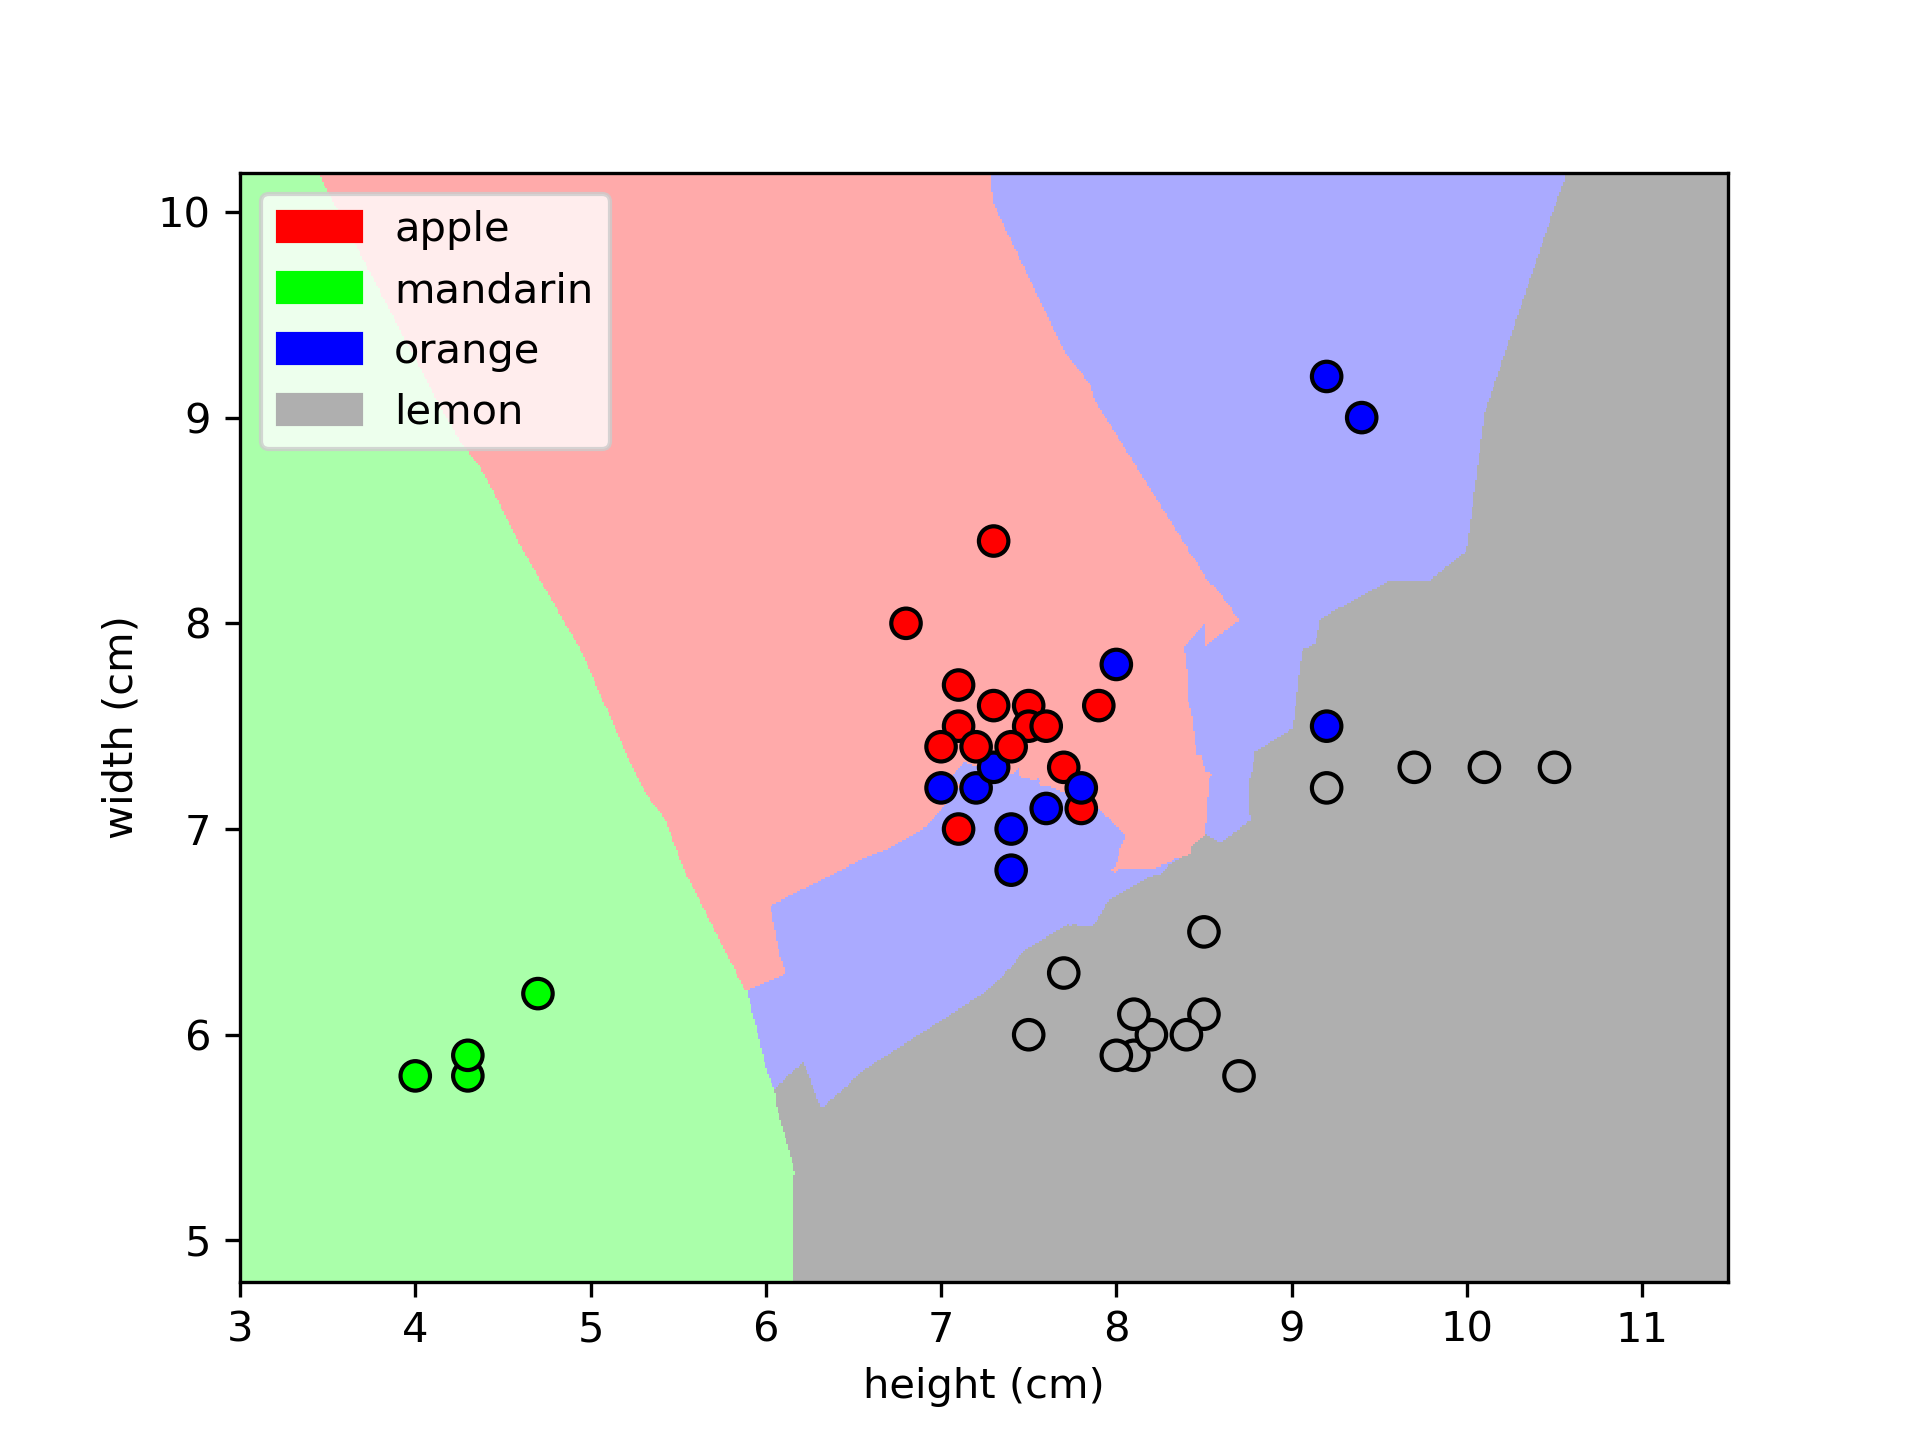

/Users/abhijitramesh/development/Intro_DataScience/Applied_Machine_Learning/adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


In [13]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform');

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


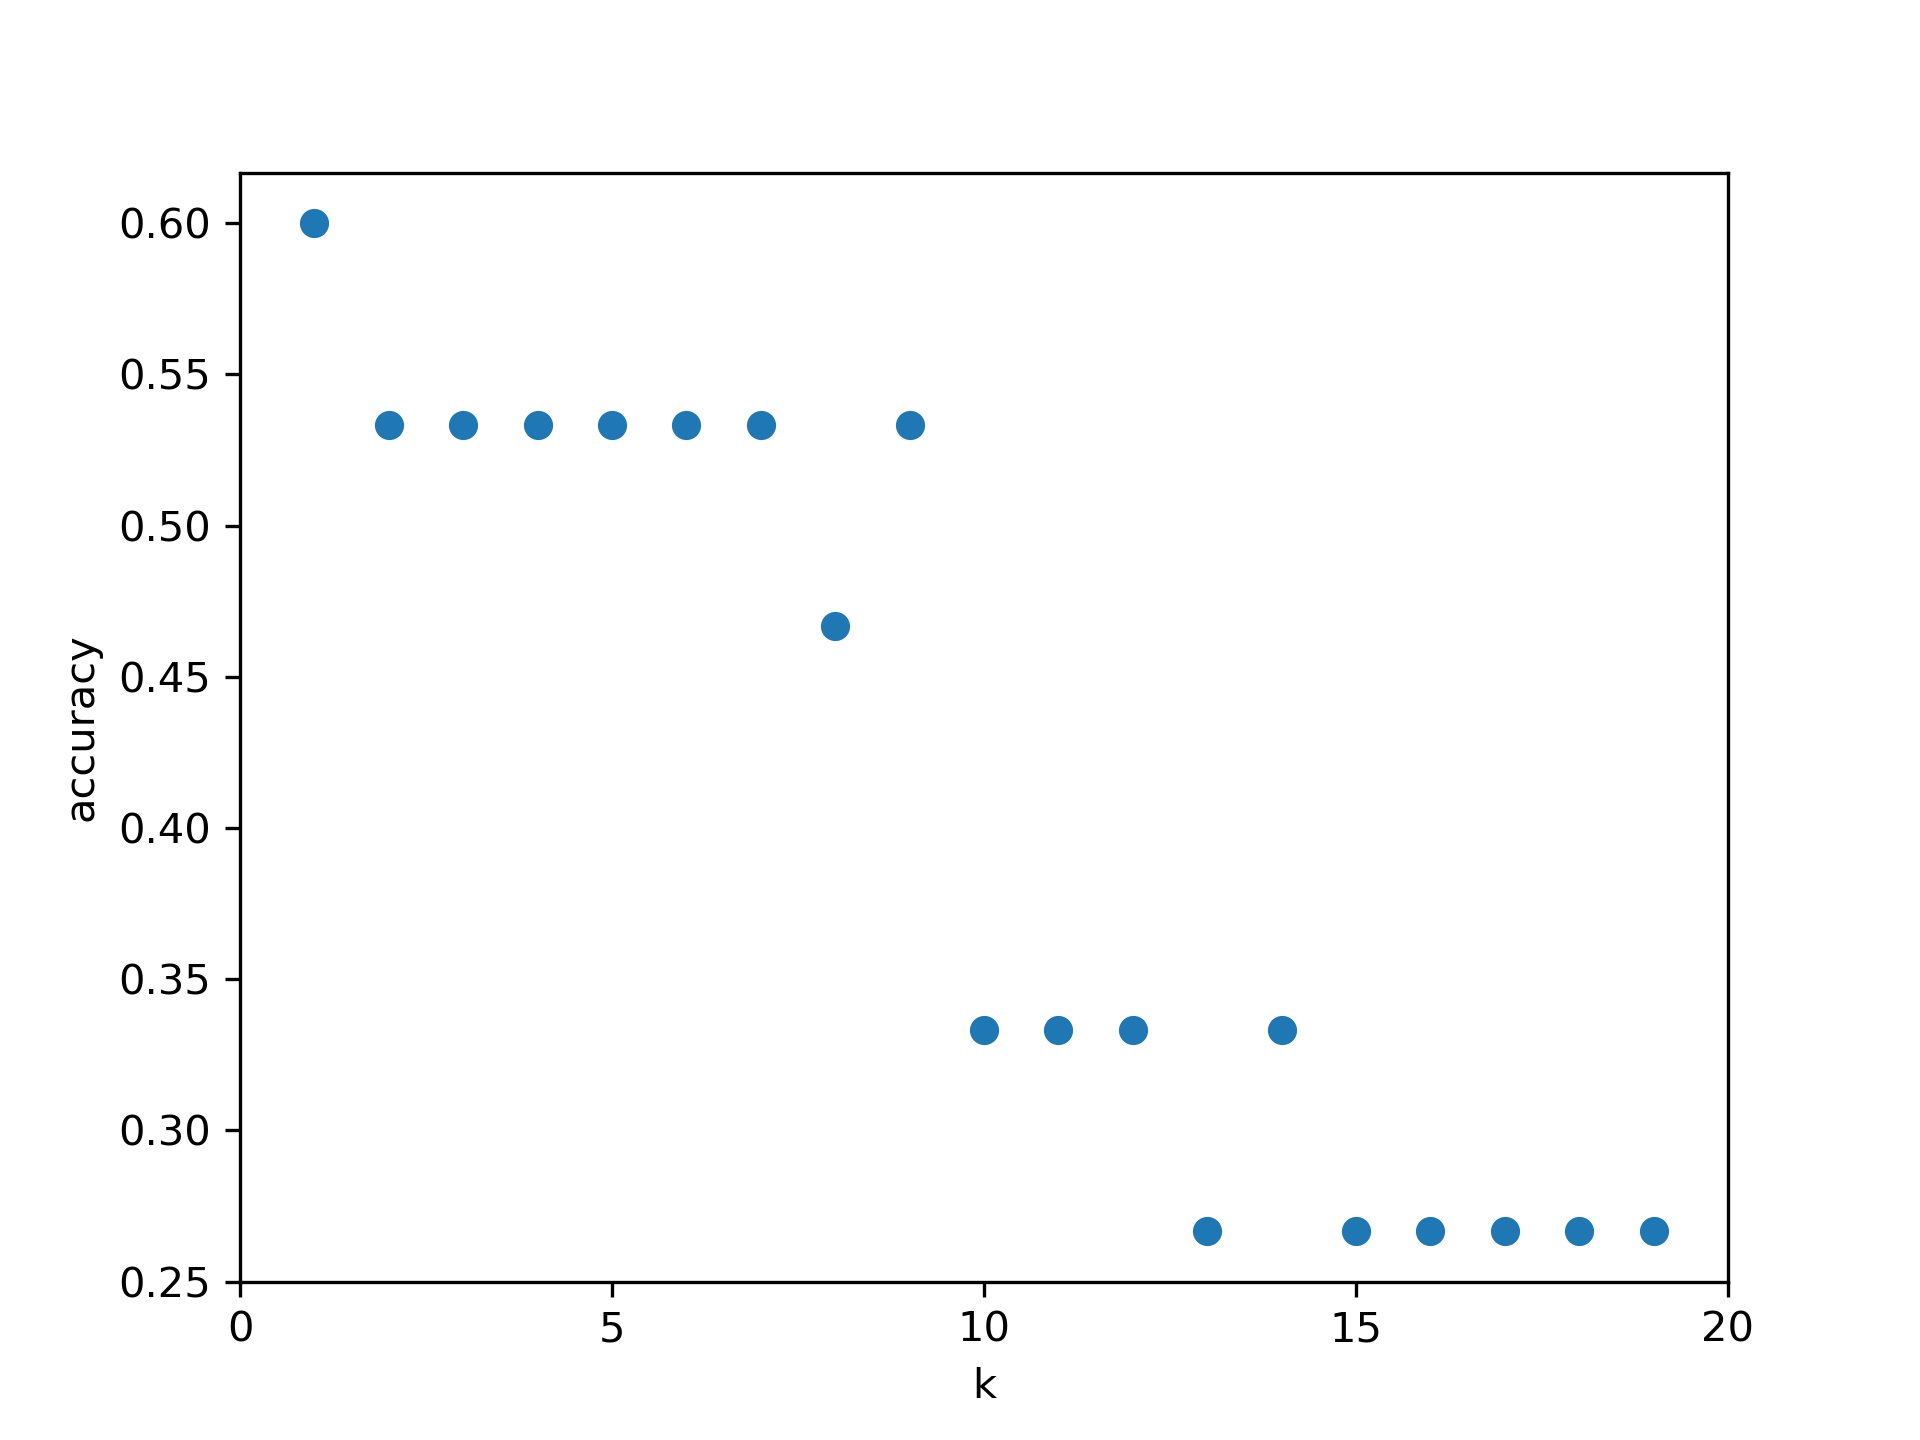

In [12]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);